In [1]:
### Importing packages for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
### Importing CSV

df = pd.read_csv('bikers.csv', low_memory=False)

In [3]:
### Binning target category (INJURY_CLASSIFICATION)

df.loc[df['INJURY_CLASSIFICATION'] == 'INCAPACITATING INJURY', 'INJURY_BAD'] = 1
df.loc[df['INJURY_CLASSIFICATION'] == 'FATAL', 'INJURY_BAD'] = 1

df.loc[df['INJURY_CLASSIFICATION'] == 'REPORTED, NOT EVIDENT', 'INJURY_BAD'] = 0
df.loc[df['INJURY_CLASSIFICATION'] == 'NO INDICATION OF INJURY', 'INJURY_BAD'] = 0
df.loc[df['INJURY_CLASSIFICATION'] == 'NONINCAPACITATING INJURY', 'INJURY_BAD'] = 0

<AxesSubplot:ylabel='SAFETY_EQUIPMENT'>

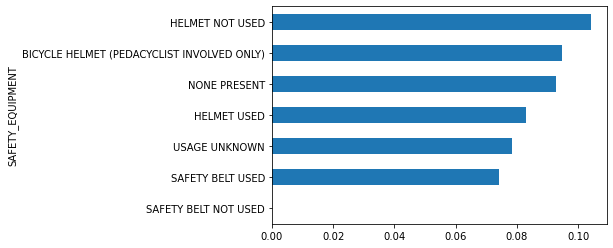

In [4]:
### Binning HELMET_USED feature:

df.loc[df['SAFETY_EQUIPMENT'] == 'HELMET USED', 'HELMET_USED'] = 1
df.loc[df['SAFETY_EQUIPMENT'] == 'BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)', 'HELMET_USED'] = 1

df.loc[df['SAFETY_EQUIPMENT'] == 'HELMET NOT USED', 'HELMET_USED'] = 0
df.loc[df['SAFETY_EQUIPMENT'] == 'NONE PRESENT', 'HELMET_USED'] = 0

df.loc[df['SAFETY_EQUIPMENT'] == 'SAFETY BELT USED', 'HELMET_USED'] = 'Unknown'
df.loc[df['SAFETY_EQUIPMENT'] == 'SAFETY BELT NOT USED', 'HELMET_USED'] = 'Unknown'
df.loc[df['SAFETY_EQUIPMENT'] == 'USAGE UNKNOWN', 'HELMET_USED'] = 'Unknown'

df.groupby(by=['SAFETY_EQUIPMENT'])['INJURY_BAD'].mean().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='age_bins'>

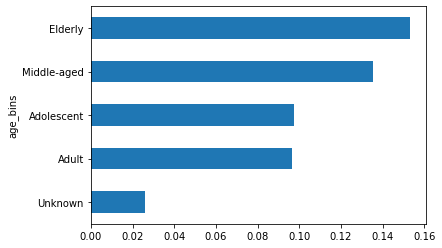

In [5]:
### Binning AGE into 20 year buckets:

def age_bins(row):
    if row['AGE'] <= 20:
        return 'Adolescent'
    elif 20 < row['AGE'] <= 40:
        return 'Adult'
    elif 40 < row['AGE'] <= 60:
        return 'Middle-aged'
    elif 60 < row['AGE']:
        return 'Elderly'
    else:
        return 'Unknown'
    

df['age_bins'] = df.apply(age_bins,axis=1)

df.groupby(by=['age_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh')

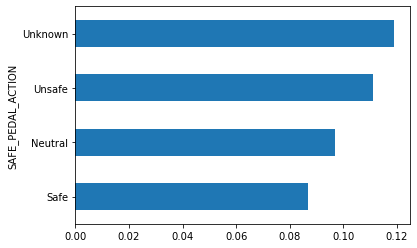

In [6]:
### Binning pedpedal action:

df.loc[df['PEDPEDAL_ACTION'] == 'WITH TRAFFIC', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'TURNING LEFT', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'TURNING RIGHT', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - WITH SIGNAL', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'ENTER FROM DRIVE/ALLEY', 'SAFE_PEDAL_ACTION'] = 'Safe'
df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - NO CONTROLS (AT INTERSECTION)', 'SAFE_PEDAL_ACTION'] = 'Safe'

df.loc[df['PEDPEDAL_ACTION'] == 'NO ACTION', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'OTHER ACTION', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'STANDING IN ROADWAY', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'PARKED VEHICLE', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'WAITING FOR SCHOOL BUS', 'SAFE_PEDAL_ACTION'] = 'Neutral'
df.loc[df['PEDPEDAL_ACTION'] == 'SCHOOL BUS (WITHIN 50 FT.)', 'SAFE_PEDAL_ACTION'] = 'Neutral'

df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - CONTROLS PRESENT (NOT AT INTERSECTION)', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'AGAINST TRAFFIC', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - AGAINST SIGNAL', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'CROSSING - NO CONTROLS (NOT AT INTERSECTION)', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'NOT AT INTERSECTION', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'INTOXICATED PED/PEDAL', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'PLAYING IN ROADWAY', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'WORKING IN ROADWAY', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'PLAYING/WORKING ON VEHICLE', 'SAFE_PEDAL_ACTION'] = 'Unsafe'
df.loc[df['PEDPEDAL_ACTION'] == 'TO/FROM DISABLED VEHICLE', 'SAFE_PEDAL_ACTION'] = 'Unsafe'

df.loc[df['PEDPEDAL_ACTION'] == 'UNKNOWN/NA', 'SAFE_PEDAL_ACTION'] = 'Unknown'

df.groupby(by=['SAFE_PEDAL_ACTION'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

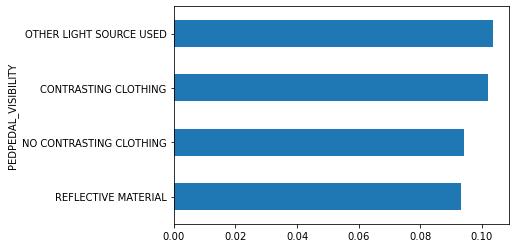

In [7]:
### Binning pedpedal visibility:

df.loc[df['PEDPEDAL_VISIBILITY'] == 'REFLECTIVE MATERIAL', 'PROTECTIVE_CLOTHING'] = 1
df.loc[df['PEDPEDAL_VISIBILITY'] == 'OTHER LIGHT SOURCE USED', 'PROTECTIVE_CLOTHING'] = 1
df.loc[df['PEDPEDAL_VISIBILITY'] == 'CONTRASTING CLOTHING', 'PROTECTIVE_CLOTHING'] = 1

df.loc[df['PEDPEDAL_VISIBILITY'] == 'NO CONTRASTING CLOTHING', 'PROTECTIVE_CLOTHING'] = 0

df.groupby(by=['PEDPEDAL_VISIBILITY'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

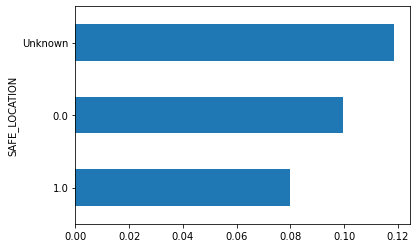

In [8]:
### Binning pedpeal location:

df.loc[df['PEDPEDAL_LOCATION'] == 'BIKEWAY', 'SAFE_LOCATION'] = 1
df.loc[df['PEDPEDAL_LOCATION'] == 'BIKE LANE', 'SAFE_LOCATION'] = 1
df.loc[df['PEDPEDAL_LOCATION'] == 'NOT IN ROADWAY', 'SAFE_LOCATION'] = 1
df.loc[df['PEDPEDAL_LOCATION'] == 'DRIVEWAY ACCESS', 'SAFE_LOCATION'] = 1

df.loc[df['PEDPEDAL_LOCATION'] == 'IN CROSSWALK', 'SAFE_LOCATION'] = 0
df.loc[df['PEDPEDAL_LOCATION'] == 'SHOULDER', 'SAFE_LOCATION'] = 0
df.loc[df['PEDPEDAL_LOCATION'] == 'IN ROADWAY', 'SAFE_LOCATION'] = 0

df.loc[df['PEDPEDAL_LOCATION'] == 'UNKNOWN/NA', 'SAFE_LOCATION'] = 'Unknown'

df.groupby(by=['SAFE_LOCATION'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

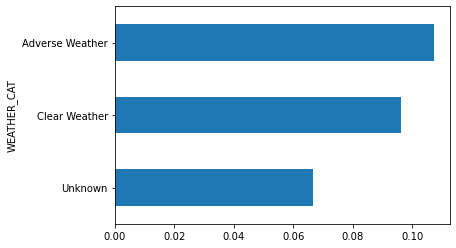

In [9]:
### Encoding WEATHER_CONDITION as categorical variables

def weather_rating(row):  
    if (row['WEATHER_CONDITION'] == 'CLEAR' or row['WEATHER_CONDITION'] == 'CLOUDY/OVERCAST'):
        return 'Clear Weather'
    elif row['WEATHER_CONDITION'] != 'UNKNOWN':
        return 'Adverse Weather'
    return 'Unknown'

df['WEATHER_CAT'] = df.apply(lambda row: weather_rating(row), axis=1)



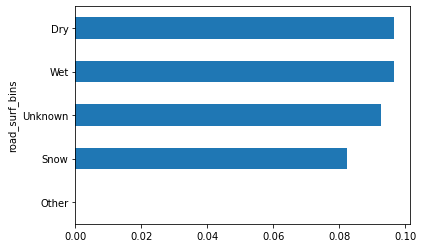

In [10]:
### Encoding ROADWAY_SURFACE_COND as categorical variables

def road_surf_bins(row):
    other = ['OTHER', 'SAND,MUD,DIRT']
    dry = ['DRY']
    wet = ['WET']
    snow = ['SNOW OR SLUSH','ICE']
    unknown = ['UNKNOWN']
    if row['ROADWAY_SURFACE_COND'] in other:
        return 'Other'
    if row['ROADWAY_SURFACE_COND'] in dry:
        return 'Dry'
    if row['ROADWAY_SURFACE_COND'] in wet:
        return 'Wet'
    if row['ROADWAY_SURFACE_COND'] in snow:
        return 'Snow'
    if row['ROADWAY_SURFACE_COND'] in unknown:
        return 'Unknown'
    else:
        return 'Unknown'
    

df['road_surf_bins'] = df.apply(road_surf_bins,axis=1)

df.groupby(by=['road_surf_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

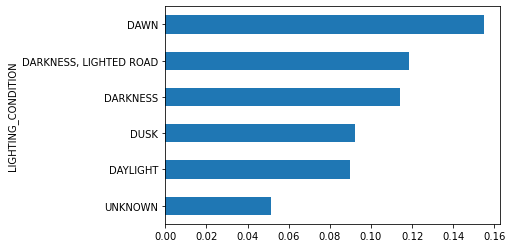

In [11]:
### Encoding LIGHTING_CONDITION as binary values (DAYTIME vs. NIGHTTIME)

df['DAYTIME'] = 1
df.loc[df['LIGHTING_CONDITION'] != 'DAYLIGHT', 'DAYTIME'] = 0

df.groupby(by=['LIGHTING_CONDITION'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

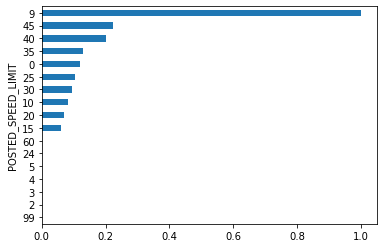

In [12]:
### Encoding POSTED_SPEED_LIMIT as SPEED_RATING w/ ordinal values with 30 as the threshold

def speed_rating(row):  
    if row['POSTED_SPEED_LIMIT'] < 30:
        return 'Below Average Speed'
    elif row['POSTED_SPEED_LIMIT'] == 30:
        return 'Average Speed'
    elif row['POSTED_SPEED_LIMIT'] > 30:
        return 'Above Average Speed'
    return 'Unknown'

df['SPEED_RATING'] = df.apply(lambda row: speed_rating(row), axis=1)



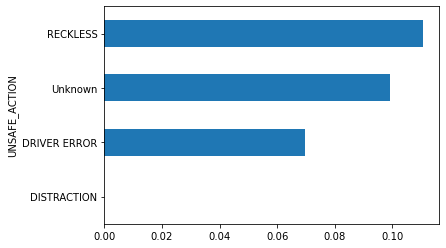

In [13]:
 ### FIX ON MAKING MORE CATEGORIES. CONDITIONS, RECKLESS, DISTRACTION

df.loc[df['DRIVER_ACTION'] == 'DISREGARDED CONTROL DEVICES', 'UNSAFE_ACTION'] = 'RECKLESS'
df.loc[df['DRIVER_ACTION'] == 'FOLLOWED TOO CLOSELY', 'UNSAFE_ACTION'] = 'RECKLESS'
df.loc[df['DRIVER_ACTION'] == 'EVADING POLICE VEHICLE', 'UNSAFE_ACTION'] = 'RECKLESS'
df.loc[df['DRIVER_ACTION'] == 'TOO FAST FOR CONDITIONS', 'UNSAFE_ACTION'] = 'RECKLESS'
df.loc[df['DRIVER_ACTION'] == 'WRONG WAY/SIDE', 'UNSAFE_ACTION'] = 'RECKLESS'

df.loc[df['DRIVER_ACTION'] == 'TEXTING', 'UNSAFE_ACTION'] = 'DISTRACTION'
df.loc[df['DRIVER_ACTION'] == 'CELL PHONE USE OTHER THAN TEXTING', 'UNSAFE_ACTION'] = 'DISTRACTION'

df.loc[df['DRIVER_ACTION'] == 'IMPROPER PARKING', 'UNSAFE_ACTION'] = 'DRIVER ERROR'
df.loc[df['DRIVER_ACTION'] == 'OVERCORRECTED', 'UNSAFE_ACTION'] = 'DRIVER ERROR'
df.loc[df['DRIVER_ACTION'] == 'EMERGENCY VEHICLE ON CALL', 'UNSAFE_ACTION'] = 'DRIVER ERROR'
df.loc[df['DRIVER_ACTION'] == 'IMPROPER TURN', 'UNSAFE_ACTION'] = 'DRIVER ERROR'
df.loc[df['DRIVER_ACTION'] == 'IMPROPER LANE CHANGE', 'UNSAFE_ACTION'] = 'DRIVER ERROR'
df.loc[df['DRIVER_ACTION'] == 'IMPROPER PASSING', 'UNSAFE_ACTION'] = 'DRIVER ERROR'
df.loc[df['DRIVER_ACTION'] == 'FAILED TO YIELD', 'UNSAFE_ACTION'] = 'DRIVER ERROR'

df.loc[df['DRIVER_ACTION'] == 'NONE', 'UNSAFE_ACTION'] = 'Unknown'
df.loc[df['DRIVER_ACTION'] == 'OTHER', 'UNSAFE_ACTION'] = 'Unknown'
df.loc[df['DRIVER_ACTION'] == 'UNKNOWN', 'UNSAFE_ACTION'] = 'Unknown' 

df.groupby(by=['UNSAFE_ACTION'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

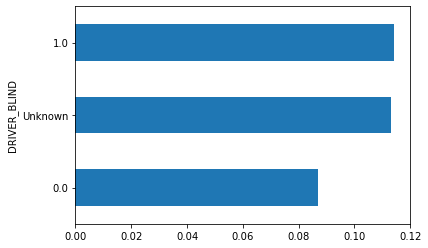

In [14]:
### Binning DRIVER_VISION into binary:

df.loc[df['DRIVER_VISION'] == 'MOVING VEHICLES', 'DRIVER_BLIND'] = 1
df.loc[df['DRIVER_VISION'] == 'PARKED VEHICLES', 'DRIVER_BLIND'] = 1
df.loc[df['DRIVER_VISION'] == 'BUILDINGS', 'DRIVER_BLIND'] = 1
df.loc[df['DRIVER_VISION'] == 'TREES, PLANTS', 'DRIVER_BLIND'] = 1
df.loc[df['DRIVER_VISION'] == 'WINDSHIELD (WATER/ICE)', 'DRIVER_BLIND'] = 1
df.loc[df['DRIVER_VISION'] == 'BLINDED - SUNLIGHT', 'DRIVER_BLIND'] = 1
df.loc[df['DRIVER_VISION'] == 'BLINDED - HEADLIGHTS', 'DRIVER_BLIND'] = 1
df.loc[df['DRIVER_VISION'] == 'HILLCREST', 'DRIVER_BLIND'] = 1

df.loc[df['DRIVER_VISION'] == 'NOT OBSCURED', 'DRIVER_BLIND'] = 0
df.loc[df['DRIVER_VISION'] == 'OTHER', 'DRIVER_BLIND'] = 0

df.loc[df['DRIVER_VISION'] == 'UNKNOWN', 'DRIVER_BLIND'] = 'Unknown'

df.groupby(by=['DRIVER_BLIND'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

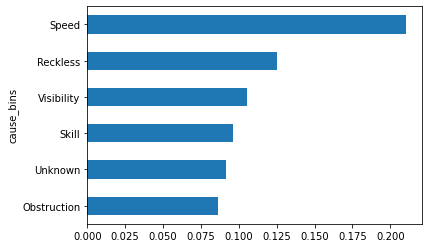

In [15]:
### Encoding Primary and Secondary Cause Classifier

def cause_bins(row):
    cause_obstruction = ['EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST', 'ROAD CONSTRUCTION/MAINTENANCE', 
                         'RELATED TO BUS STOP', 'OBSTRUCTED CROSSWALKS', 'ANIMAL']
    cause_not_applicable = ['UNABLE TO DETERMINE', 'NOT APPLICABLE']
    cause_reckless = ['EQUIPMENT - VEHICLE CONDITION', 'PHYSICAL CONDITION OF DRIVER', 'IMPROPER BACKING', 
                      'TEXTING', 'DISTRACTION - FROM INSIDE VEHICLE', 'IMPROPER OVERTAKING/PASSING', 
                      'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)', 
                      'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)', 
                      'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER', 
                      'CELL PHONE USE OTHER THAN TEXTING', 'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)']
    cause_skill = ['IMPROPER LANE USAGE', 'DISREGARDING TRAFFIC SIGNALS', 'DISREGARDING ROAD MARKINGS', 
                   'FAILING TO YIELD RIGHT-OF-WAY', 'BICYCLE ADVANCING LEGALLY ON RED LIGHT', 
                   'IMPROPER TURNING/NO SIGNAL', 'TURNING RIGHT ON RED', 'FOLLOWING TOO CLOSELY', 
                   'DISREGARDING STOP SIGN', 'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE', 'FAILING TO REDUCE SPEED TO AVOID CRASH', 
                   'DISREGARDING OTHER TRAFFIC SIGNS', 'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT', 'DISREGARDING YIELD SIGN']
    cause_speed = ['EXCEEDING SAFE SPEED FOR CONDITIONS', 'EXCEEDING AUTHORIZED SPEED LIMIT']
    cause_visibility = ['VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)', 'ROAD ENGINEERING/SURFACE/MARKING DEFECTS', 
                        'WEATHER', 'DISTRACTION - FROM OUTSIDE VEHICLE']
    if row['PRIM_CONTRIBUTORY_CAUSE'] in cause_obstruction:
        return 'Obstruction'
    if row['PRIM_CONTRIBUTORY_CAUSE'] in cause_reckless:
        return 'Reckless'
    if row['PRIM_CONTRIBUTORY_CAUSE'] in cause_skill:
        return 'Skill'
    if row['PRIM_CONTRIBUTORY_CAUSE'] in cause_speed:
        return 'Speed'
    if row['PRIM_CONTRIBUTORY_CAUSE'] in cause_visibility:
        return 'Visibility'
    if row['PRIM_CONTRIBUTORY_CAUSE'] in cause_not_applicable and row['SEC_CONTRIBUTORY_CAUSE'] in cause_not_applicable:
        if row['SEC_CONTRIBUTORY_CAUSE'] in cause_obstruction:
            return 'Obstruction'
        if row['SEC_CONTRIBUTORY_CAUSE'] in cause_reckless:
            return 'Reckless'
        if row['SEC_CONTRIBUTORY_CAUSE'] in cause_skill:
            return 'Skill'
        if row['SEC_CONTRIBUTORY_CAUSE'] in cause_speed:
            return 'Speed'
        if row['SEC_CONTRIBUTORY_CAUSE'] in cause_visibility:
            return 'Visibility'
    if row['PRIM_CONTRIBUTORY_CAUSE'] in cause_not_applicable:
        return 'Unknown' 
    else:
        return 'Unknown'
    

df['cause_bins'] = df.apply(cause_bins,axis=1)

df.groupby(by=['cause_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

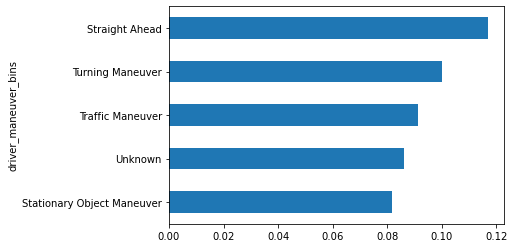

In [16]:
## Binning maneuver

def driver_maneuver(row):
    man_straight = ['STRAIGHT AHEAD']
    man_turn = ['TURNING LEFT', 'TURNING RIGHT', 'U-TURN', 
            'SLOW/STOP - RIGHT TURN', 'SLOW/STOP - LEFT TURN',
            'AVOIDING VEHICLES/OBJECTS', 'TURNING ON RED', 'NEGOTIATING A CURVE']
    man_traffic = ['PASSING/OVERTAKING', 'MERGING', 'ENTER FROM DRIVE/ALLEY', 'ENTERING TRAFFIC LANE FROM PARKING', 
               'LEAVING TRAFFIC LANE TO PARK', 'CHANGING LANES', 'STARTING IN TRAFFIC', 'BACKING', 
               'SLOW/STOP - LOAD/UNLOAD', 'DRIVING WRONG WAY', 'SKIDDING/CONTROL LOSS']
    man_stationary = ['PARKED', 'SLOW/STOP IN TRAFFIC', 'PARKED IN TRAFFIC LANE']
    man_unknown = ['UNKNOWN/NA', 'OTHER', 'DRIVERLESS', 'DISABLED', 'DIVERGING']
    if row['MANEUVER'] in man_straight:
        return 'Straight Ahead'
    if row['MANEUVER'] in man_turn:
        return 'Turning Maneuver'
    if row['MANEUVER'] in man_traffic:
        return 'Traffic Maneuver'
    if row['MANEUVER'] in man_stationary:
        return 'Stationary Object Maneuver'
    if row['MANEUVER'] in man_unknown:
        return 'Unknown'
    else:
        return 'Unknown'
    
df['driver_maneuver_bins'] = df.apply(driver_maneuver,axis=1)

df.groupby(by=['driver_maneuver_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

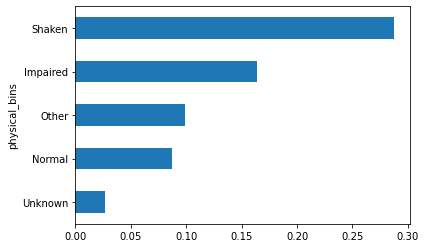

In [17]:
## Bin Physical Condition

def physical_bins(row):
    impaired = ['HAD BEEN DRINKING','FATIGUED/ASLEEP','IMPAIRED - ALCOHOL','IMPAIRED - DRUGS','MEDICATED','IMPAIRED - ALCOHOL AND DRUGS']
    normal = ['NORMAL']
    shaken = ['REMOVED BY EMS','ILLNESS/FAINTED','EMOTIONAL']
    other = ['UNKNOWN','OTHER']
    if row['PHYSICAL_CONDITION'] in impaired:
        return 'Impaired'
    if row['PHYSICAL_CONDITION'] in normal:
        return 'Normal'
    if row['PHYSICAL_CONDITION'] in shaken:
        return 'Shaken'
    if row['PHYSICAL_CONDITION'] in other:
        return 'Other'
    else:
        return 'Unknown'
    

df['physical_bins'] = df.apply(physical_bins,axis=1)

df.groupby(by=['physical_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

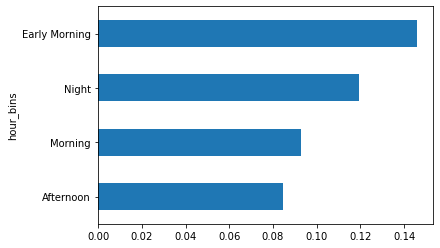

In [18]:
## Bin Hour in the Day

def hour_bins(row):
    if 1 <= row['CRASH_HOUR'] <= 6:
        return 'Early Morning'
    if 7 <= row['CRASH_HOUR'] <= 12:
        return 'Morning'
    if 13 <= row['CRASH_HOUR'] <= 18:
        return 'Afternoon'
    if 19 <= row['CRASH_HOUR'] <= 23 or row['CRASH_HOUR'] == 0:
        return 'Night'
    else:
        return 'Unknown'
    

df['hour_bins'] = df.apply(hour_bins,axis=1)

df.groupby(by=['hour_bins'])['INJURY_BAD'].mean().sort_values().plot(kind='barh');

In [22]:
bf = df.iloc[:,-16:]
bf['SEX'] = df['SEX']
bf['INJURY_BAD'] = bf['INJURY_BAD'].astype(float)
bf['PROTECTIVE_CLOTHING'] = bf['PROTECTIVE_CLOTHING'].astype(float)

In [24]:
bf.to_csv("bikers_semi_final_v2.csv")